# Twitter Sentiment Analysis

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [2]:
cols = ['ID','Entity','Sentiment','Content']
df = pd.read_csv('D:/twitter_training.csv',names=cols)
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### Visualization of dataset

In [4]:
df.shape

(74682, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
#finding the number of duplicated rows
print("Number of duplicated rows :",df.duplicated().sum())

Number of duplicated rows : 2700


In [7]:
df = df.drop_duplicates()

In [8]:
print("Number of duplicated rows :",df.duplicated().sum())

Number of duplicated rows : 0


In [9]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      326
dtype: int64

In [10]:
import warnings
warnings.simplefilter('ignore')

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [13]:
df['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

### Visualization of count of different entity

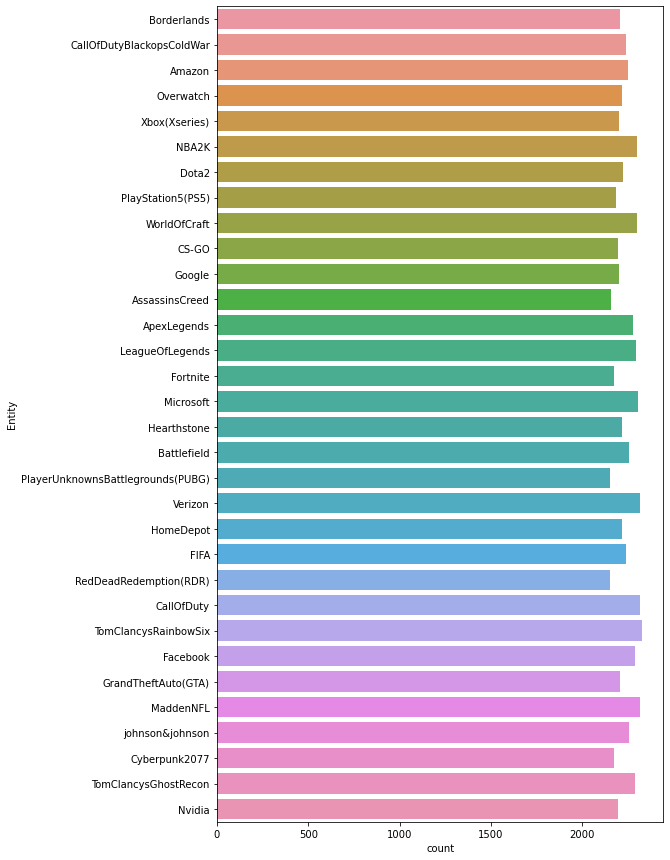

In [14]:
plt.figure(figsize=(8,15))
sns.countplot(y='Entity',data=df)
plt.show()

In [15]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

### Sentiment distribution

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

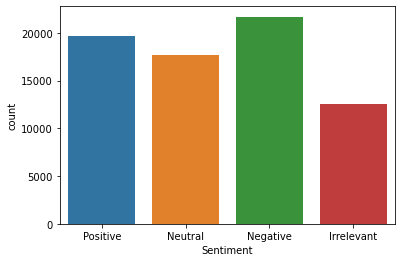

In [16]:
sns.countplot(x='Sentiment',data=df)

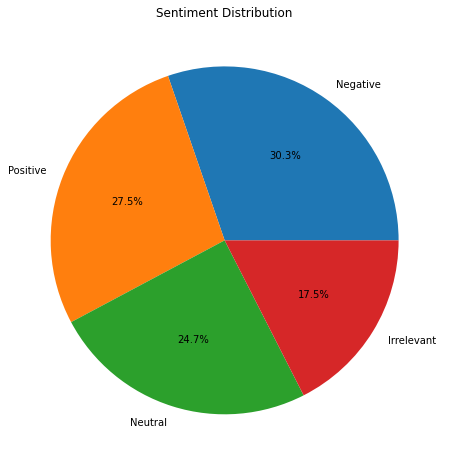

In [17]:
sentiment_count = df['Sentiment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sentiment_count,labels=sentiment_count.index,autopct="%1.1f%%")

plt.title("Sentiment Distribution")
plt.show()

### Entity wise sentiment distribution

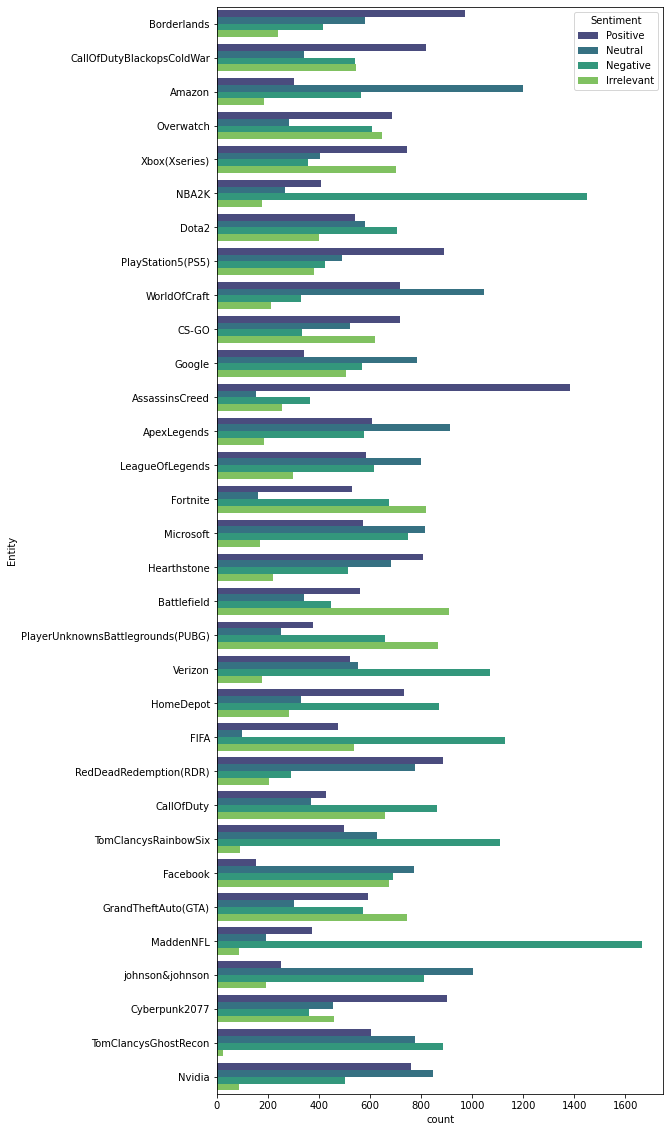

In [18]:
plt.figure(figsize=(8,20))
sns.countplot(y='Entity',data=df,hue='Sentiment',palette='viridis')
plt.show()

### Top 5 Entities with negative sentiment

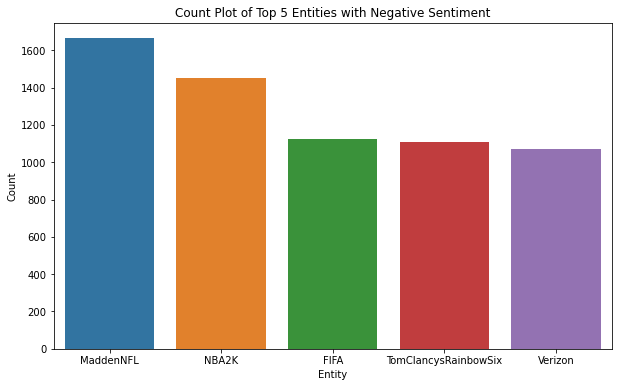

In [19]:
negative_sentiment_df = df[df['Sentiment'] == 'Negative']

entity_counts = negative_sentiment_df['Entity'].value_counts()

top_5_entities = entity_counts.head(5).index

top_5_df = negative_sentiment_df[negative_sentiment_df['Entity'].isin(top_5_entities)]


plt.figure(figsize=(10, 6))
sns.countplot(data=top_5_df, x='Entity', order=top_5_entities)
plt.title('Count Plot of Top 5 Entities with Negative Sentiment')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

### Top 5 Entities with positive sentiment

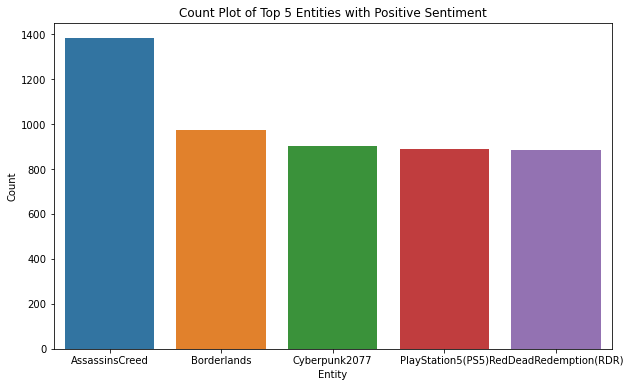

In [20]:
positive_sentiment_df = df[df['Sentiment'] == 'Positive']

entity_counts = positive_sentiment_df['Entity'].value_counts()

top_5_entities = entity_counts.head(5).index

top_5_df = positive_sentiment_df[positive_sentiment_df['Entity'].isin(top_5_entities)]


plt.figure(figsize=(10, 6))
sns.countplot(data=top_5_df, x='Entity', order=top_5_entities)
plt.title('Count Plot of Top 5 Entities with Positive Sentiment')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

### Top 5 Entities with neutral sentiment

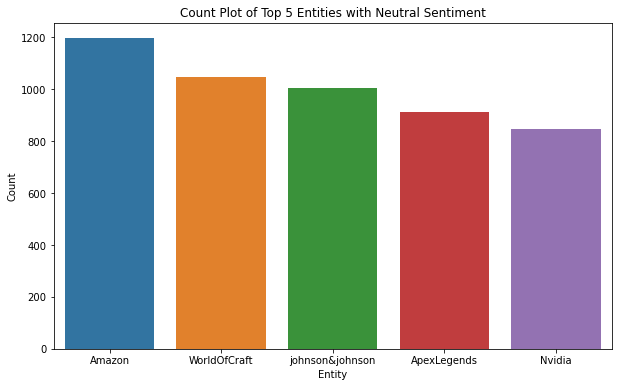

In [22]:
neutral_sentiment_df = df[df['Sentiment'] == 'Neutral']

entity_counts = neutral_sentiment_df['Entity'].value_counts()

top_5_entities = entity_counts.head(5).index

top_5_df = neutral_sentiment_df[neutral_sentiment_df['Entity'].isin(top_5_entities)]


plt.figure(figsize=(10, 6))
sns.countplot(data=top_5_df, x='Entity', order=top_5_entities)
plt.title('Count Plot of Top 5 Entities with Neutral Sentiment')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

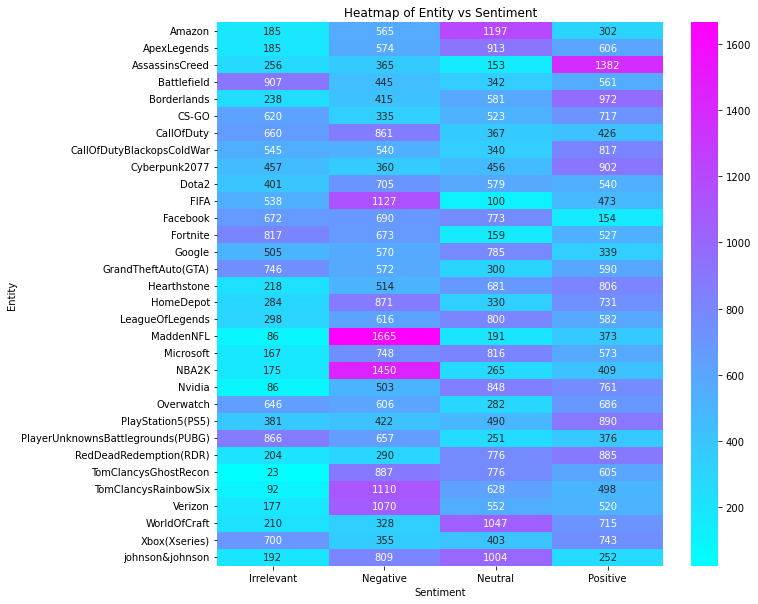

In [23]:
crosstab = pd.crosstab(index=df['Entity'], columns=df['Sentiment'])

plt.figure(figsize=(10, 10))  
sns.heatmap(crosstab, cmap='cool',annot=True,fmt='d')


plt.title('Heatmap of Entity vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Entity')

plt.show()

In [24]:
from wordcloud import WordCloud

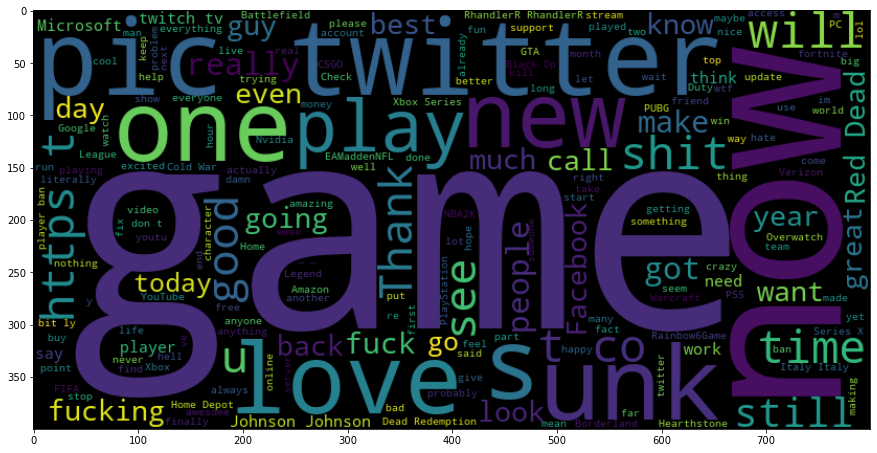

In [25]:
text = ' '.join(df['Content'])
wc = WordCloud(width=800,height=400).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wc,interpolation='bilinear')
plt.show()